# 7. Sampling and Reconstruction of Signals: Analysis of Aliasing Effects and Proper Signal Reconstruction

## Example 1: Demonstration of Aliasing

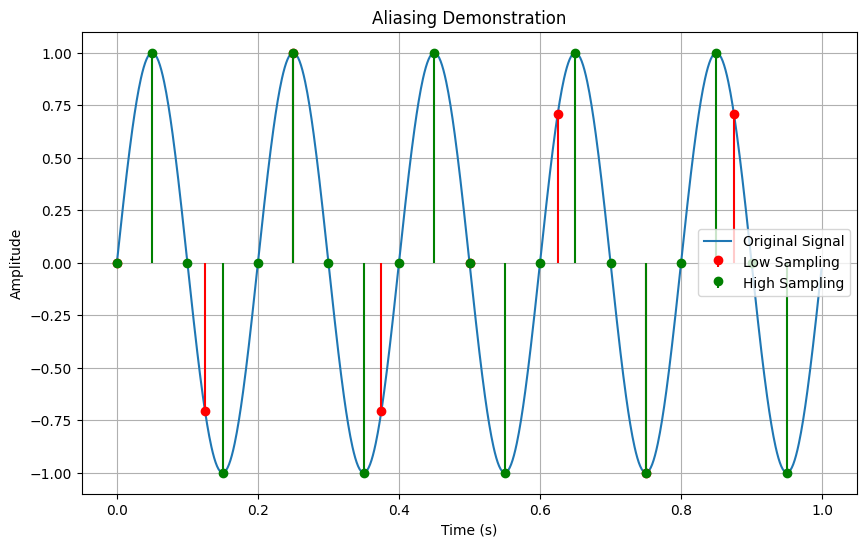

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Original signal parameters
f_signal = 5  # Frequency of the signal (Hz)
t = np.linspace(0, 1, 1000, endpoint=False)  # Time vector
signal = np.sin(2 * np.pi * f_signal * t)  # Original signal

# Sampling parameters
f_sample_low = 8  # Low sampling frequency (Hz)
f_sample_high = 20  # High sampling frequency (Hz)

# Sampling the signal
t_low = np.arange(0, 1, 1 / f_sample_low)
t_high = np.arange(0, 1, 1 / f_sample_high)
samples_low = np.sin(2 * np.pi * f_signal * t_low)
samples_high = np.sin(2 * np.pi * f_signal * t_high)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal')
plt.stem(t_low, samples_low, linefmt='r-', markerfmt='ro', basefmt=" ", label='Low Sampling')
plt.stem(t_high, samples_high, linefmt='g-', markerfmt='go', basefmt=" ", label='High Sampling')
plt.title('Aliasing Demonstration')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

## Example 2: Signal Reconstruction

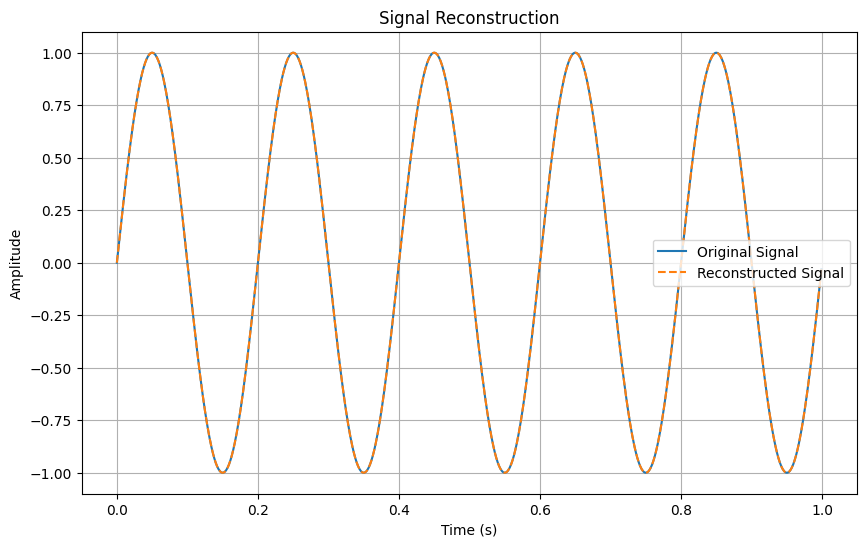

In [52]:
from scipy.signal import resample

# Reconstructing the signal using high sampling rate
num_samples = 1000
reconstructed_signal = resample(samples_high, num_samples)

# Plotting the reconstruction
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, reconstructed_signal, label='Reconstructed Signal', linestyle='--')
plt.title('Signal Reconstruction')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Constructing Different Types of Waves

## Sine Wave

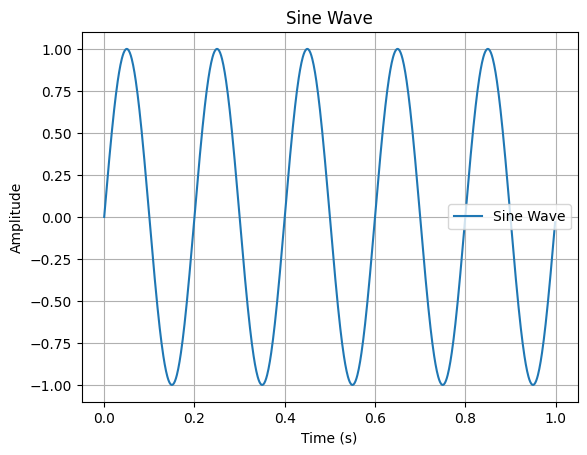

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
f = 5  # Frequency (Hz)
t = np.linspace(0, 1, 1000, endpoint=False)  # Time vector
sine_wave = np.sin(2 * np.pi * f * t)

# Plotting
plt.plot(t, sine_wave, label="Sine Wave")
plt.title("Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

## Cosine Wave

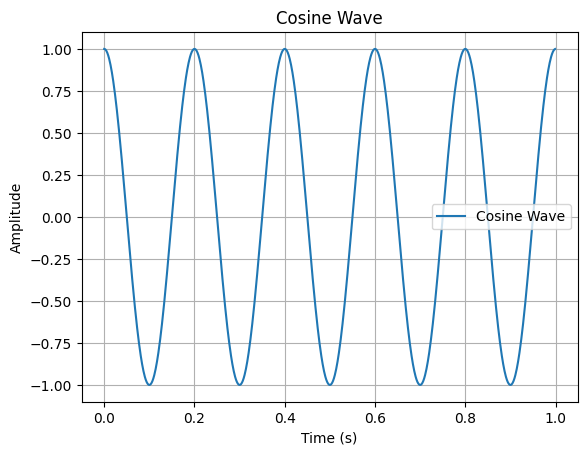

In [54]:
# Cosine wave
cosine_wave = np.cos(2 * np.pi * f * t)

# Plotting
plt.plot(t, cosine_wave, label="Cosine Wave")
plt.title("Cosine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

## Square Wave

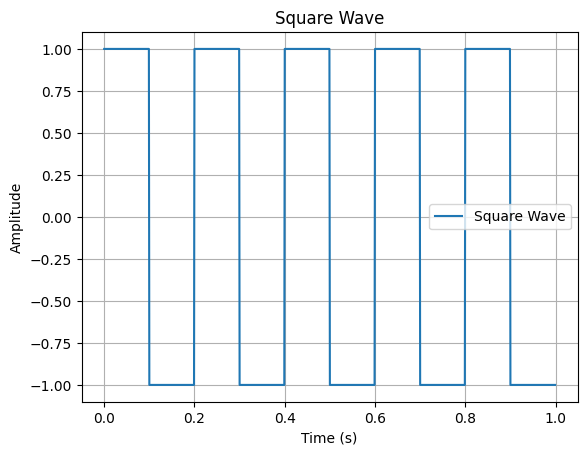

In [55]:
from scipy.signal import square

# Square wave
square_wave = square(2 * np.pi * f * t)

# Plotting
plt.plot(t, square_wave, label="Square Wave")
plt.title("Square Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

## Triangular Wave

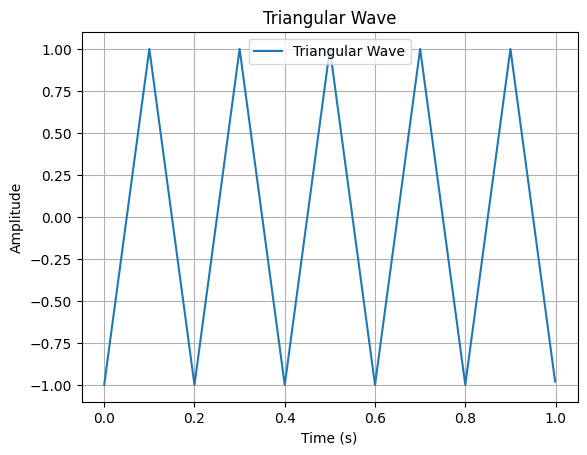

In [56]:
from scipy.signal import sawtooth

# Triangular wave (modification of sawtooth wave)
triangular_wave = sawtooth(2 * np.pi * f * t, width=0.5)

# Plotting
plt.plot(t, triangular_wave, label="Triangular Wave")
plt.title("Triangular Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

## Sawtooth Wave

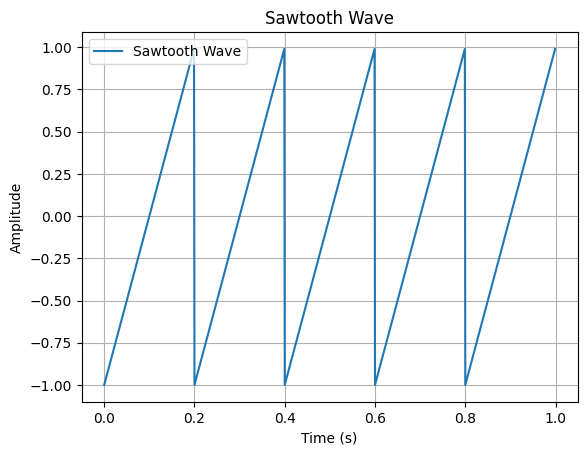

In [57]:
# Sawtooth wave
sawtooth_wave = sawtooth(2 * np.pi * f * t)

# Plotting
plt.plot(t, sawtooth_wave, label="Sawtooth Wave")
plt.title("Sawtooth Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

## Mixed signal: sum of sine and cosine waves

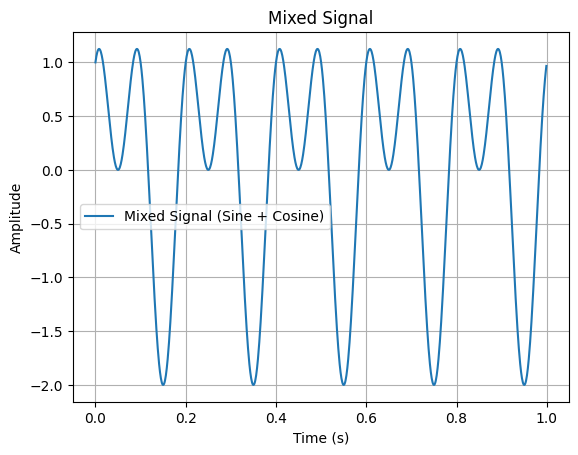

In [58]:
f1 = 5  # Frequency of sine wave
f2 = 10  # Frequency of cosine wave
mixed_signal = np.sin(2 * np.pi * f1 * t) + np.cos(2 * np.pi * f2 * t)

# Plotting
plt.plot(t, mixed_signal, label="Mixed Signal (Sine + Cosine)")
plt.title("Mixed Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

# Coding and Decoding Digital Signals

## Delta Encoding and Decoding

Delta encoding represents differences between consecutive signal samples.

In [59]:
import numpy as np

# Delta Encoding
def delta_encode(signal):
    return np.diff(np.insert(signal, 0, signal[0]))

# Delta Decoding
def delta_decode(encoded_signal):
    return np.cumsum(encoded_signal)

# Example
original_signal = [1, 2, 2, 3, 5, 8]
encoded_signal = delta_encode(original_signal)
decoded_signal = delta_decode(encoded_signal)

print("Original Signal:", original_signal)
print("Encoded Signal:", encoded_signal)
print("Decoded Signal:", decoded_signal)

Original Signal: [1, 2, 2, 3, 5, 8]
Encoded Signal: [0 1 0 1 2 3]
Decoded Signal: [0 1 1 2 4 7]


## Quantization of Signal Samples
Quantization reduces the precision of signal samples to save storage or bandwidth.

In [60]:
def quantize(signal, levels):
    min_val, max_val = min(signal), max(signal)
    step_size = (max_val - min_val) / levels
    quantized_signal = np.round((signal - min_val) / step_size) * step_size + min_val
    return quantized_signal

# Example
original_signal = np.array([1.1, 2.3, 2.9, 3.7, 5.1])
quantized_signal = quantize(original_signal, levels=3)

print("Original Signal:", original_signal)
print("Quantized Signal:", quantized_signal)

Original Signal: [1.1 2.3 2.9 3.7 5.1]
Quantized Signal: [1.1        2.43333333 2.43333333 3.76666667 5.1       ]


## Reconstructing Signals After Compression

In [61]:
#This example demonstrates signal reconstruction after compression using a simple DCT.
from scipy.fftpack import dct, idct

# Apply Discrete Cosine Transform (DCT)
def apply_dct(signal):
    return dct(signal, norm='ortho')

# Reconstruct signal using inverse DCT
def reconstruct_signal(dct_signal, threshold):
    dct_signal[np.abs(dct_signal) < threshold] = 0
    return idct(dct_signal, norm='ortho')

# Example
original_signal = np.array([1, 2, 3, 4, 5, 6, 7, 8])
dct_signal = apply_dct(original_signal)
reconstructed_signal = reconstruct_signal(dct_signal, threshold=5)

print("Original Signal:", original_signal)
print("Compressed Signal:", dct_signal)
print("Reconstructed Signal:", np.round(reconstructed_signal, 2))

Original Signal: [1 2 3 4 5 6 7 8]
Compressed Signal: [12.72792206 -6.44232302  0.          0.          0.          0.
  0.          0.        ]
Reconstructed Signal: [1.34 1.82 2.71 3.87 5.13 6.29 7.18 7.66]


## Trade-off Analysis Between Compression Ratio and Signal Distortion

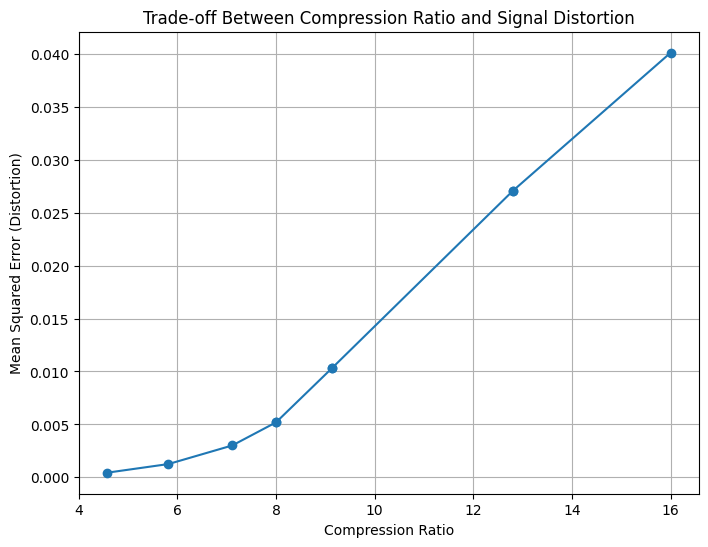

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

# Original Signal
N = 64  # Number of samples
t = np.linspace(0, 1, N)
signal = np.sin(2 * np.pi * 5 * t)  # Example sine wave

# Function for compression, reconstruction, and analysis
def analyze_tradeoff(signal, thresholds):
    original_size = len(signal)
    results = {"thresholds": [], "compression_ratios": [], "distortions": []}

    for threshold in thresholds:
        # Apply DCT
        dct_coeffs = dct(signal, norm='ortho')

        # Apply Thresholding (Compression)
        compressed_coeffs = np.where(abs(dct_coeffs) > threshold, dct_coeffs, 0)

        # Calculate Compression Ratio
        compressed_size = np.count_nonzero(compressed_coeffs)
        compression_ratio = original_size / compressed_size

        # Reconstruct Signal
        reconstructed_signal = idct(compressed_coeffs, norm='ortho')

        # Calculate Distortion (MSE)
        mse = np.mean((signal - reconstructed_signal) ** 2)

        # Store Results
        results["thresholds"].append(threshold)
        results["compression_ratios"].append(compression_ratio)
        results["distortions"].append(mse)

    return results

# Perform Analysis for a Range of Thresholds
thresholds = np.linspace(0.1, 1.0, 10)  # Threshold values
results = analyze_tradeoff(signal, thresholds)

# Plot Compression Ratio vs. Distortion
plt.figure(figsize=(8, 6))
plt.plot(results["compression_ratios"], results["distortions"], marker='o')
plt.title("Trade-off Between Compression Ratio and Signal Distortion")
plt.xlabel("Compression Ratio")
plt.ylabel("Mean Squared Error (Distortion)")
plt.grid()
plt.show()


Variant 11. Investigate reconstruction for a sine wave with f = 10 Hz, sampled at
fs = 50 Hz.

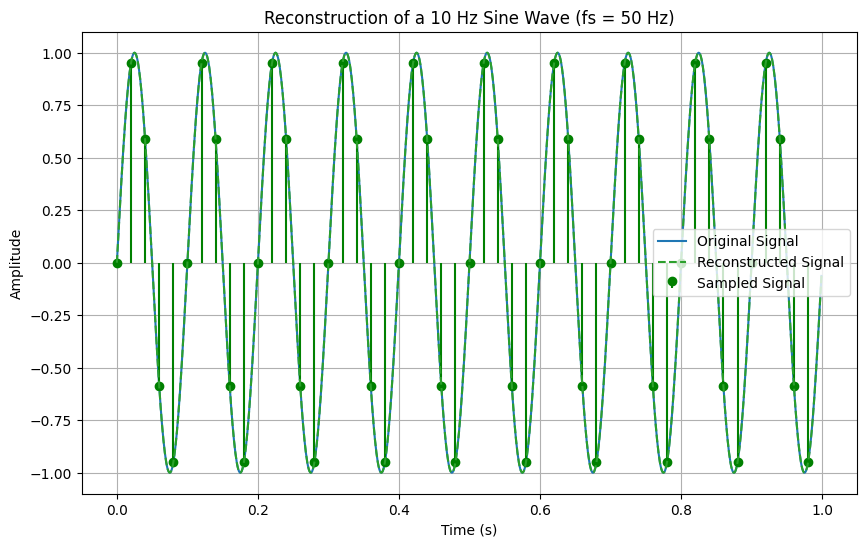

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample

# Signal parameters
f_signal = 10  # Signal frequency (Hz)
t = np.linspace(0, 1, 1000, endpoint=False)  # Time vector
signal = np.sin(2 * np.pi * f_signal * t)  # Original continuous signal

# Sampling
fs = 50  # Sampling frequency (Hz)
t_sampled = np.arange(0, 1, 1/fs)
samples = np.sin(2 * np.pi * f_signal * t_sampled)

# Signal reconstruction using resampling
reconstructed_signal = resample(samples, 1000)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal')
plt.stem(t_sampled, samples, linefmt='g-', markerfmt='go', basefmt=" ", label='Sampled Signal')
plt.plot(t, reconstructed_signal, linestyle='--', label='Reconstructed Signal')
plt.title('Reconstruction of a 10 Hz Sine Wave (fs = 50 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()


Variant 11. Solve Problem 4: Compare signal distortion and compression ratio
for thresholds of 10, 20, and 30 in DCT compression for the signal
[10, 20, 30, 40, 50, 60].

Threshold: 10, Compression Ratio: 3.00, MSE: 2.88
Threshold: 20, Compression Ratio: 3.00, MSE: 2.88
Threshold: 30, Compression Ratio: 3.00, MSE: 2.88


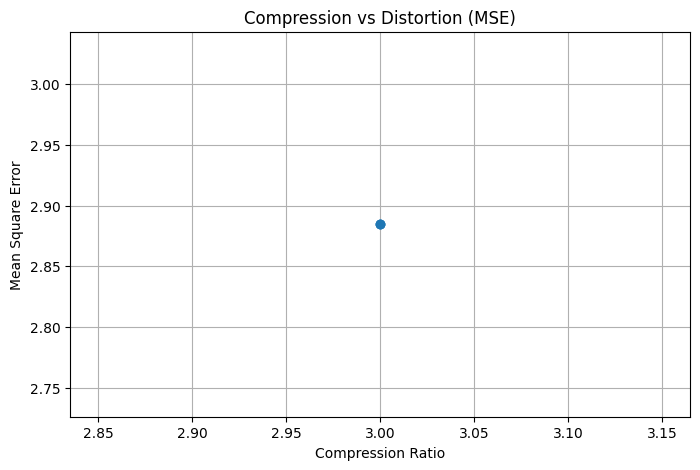

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

# Original signal
original_signal = np.array([10, 20, 30, 40, 50, 60])
original_size = len(original_signal)

# Analysis function
def analyze_dct_thresholds(signal, thresholds):
    results = {
        "threshold": [],
        "compression_ratio": [],
        "mse": []
    }

    for threshold in thresholds:
        # DCT transform
        dct_coeffs = dct(signal, norm='ortho')
        compressed = np.where(np.abs(dct_coeffs) > threshold, dct_coeffs, 0)

        # Compression ratio
        compressed_size = np.count_nonzero(compressed)
        cr = original_size / compressed_size if compressed_size != 0 else float('inf')

        # Signal reconstruction
        reconstructed = idct(compressed, norm='ortho')

        # Mean square error
        mse = np.mean((signal - reconstructed) ** 2)

        # Store results
        results["threshold"].append(threshold)
        results["compression_ratio"].append(cr)
        results["mse"].append(mse)

    return results

# Thresholds to test
thresholds = [10, 20, 30]
results = analyze_dct_thresholds(original_signal, thresholds)

# Display results
for t, cr, mse in zip(results["threshold"], results["compression_ratio"], results["mse"]):
    print(f"Threshold: {t}, Compression Ratio: {cr:.2f}, MSE: {mse:.2f}")

# Plot compression vs distortion
plt.figure(figsize=(8, 5))
plt.plot(results["compression_ratio"], results["mse"], marker='o')
plt.title("Compression vs Distortion (MSE)")
plt.xlabel("Compression Ratio")
plt.ylabel("Mean Square Error")
plt.grid()
plt.show()
